In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dark mode
plt.style.use('dark_background')

In [58]:
# read in atca visibility
vis_atca = pd.read_csv('visibility_atca_hip67522.csv')
vis_atca.head()

,UTC_start_24deg,UTC_end_24deg,date
0,09:41:00 AM,08:46:00 PM,04/01/24
1,09:37:00 AM,08:42:00 PM,04/02/24
2,09:33:00 AM,08:38:00 PM,04/03/24
3,09:29:00 AM,08:34:00 PM,04/04/24
4,09:25:00 AM,08:30:00 PM,04/05/24


In [59]:
# read in transits from file
transits = pd.read_csv('transits_hip67522.csv', skiprows=31)
transits = transits[transits.phase>0]
transits = transits[["midpointcalendar","phase"]]
transits["midpointcalendar"] = pd.to_datetime(transits["midpointcalendar"])
transits


,midpointcalendar,phase
13,2024-04-07 18:36:00,0.25
14,2024-04-14 17:37:00,0.25
15,2024-04-21 16:39:00,0.25
16,2024-04-28 15:41:00,0.25
17,2024-05-05 14:43:00,0.25
18,2024-05-12 13:44:00,0.25
19,2024-05-19 12:46:00,0.25
20,2024-05-26 11:48:00,0.25
21,2024-06-02 10:49:00,0.25
22,2024-06-09 09:51:00,0.25


/tmp/ipykernel_82574/721271542.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vis_atca["date_start"] = pd.to_datetime(vis_atca["date_start"])
/tmp/ipykernel_82574/721271542.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vis_atca["date_end"] = pd.to_datetime(vis_atca["date_end"])


(19814.397916666665, 19904.439583333333)

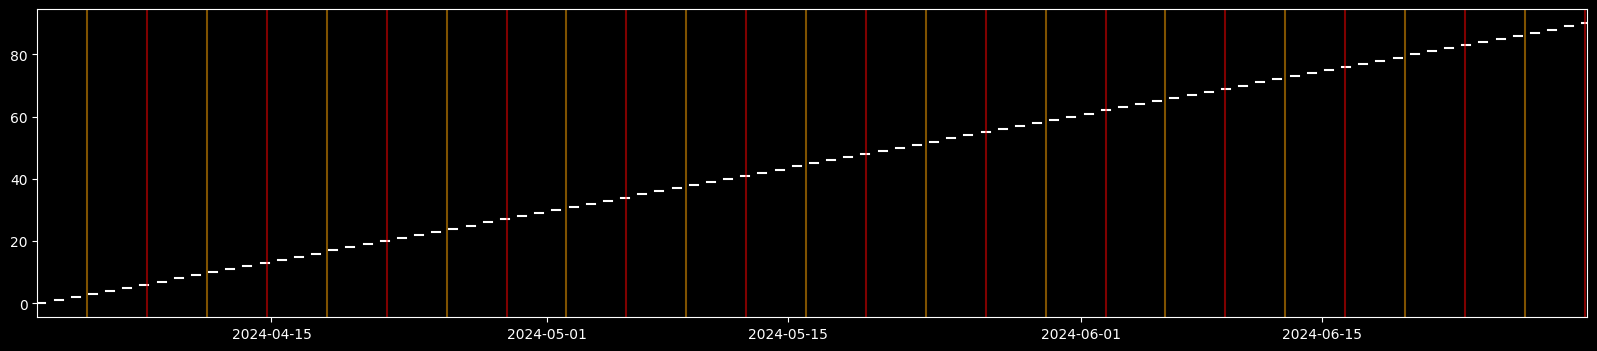

In [60]:

vis_atca["date_start"] = vis_atca["date"] + " " + vis_atca["UTC_start_24deg"]
vis_atca["date_end"] = vis_atca["date"] + " " + vis_atca["UTC_end_24deg"]
vis_atca["date_start"] = pd.to_datetime(vis_atca["date_start"])
vis_atca["date_end"] = pd.to_datetime(vis_atca["date_end"])
plt.figure(figsize=(20,4))

for label,row in vis_atca.iterrows():
    # plot a horizontal line for each visibility
    # print(label)
    plt.plot([row.date_start, row.date_end], [label,label], color='white', alpha=1)

for label,row in transits.iterrows():
    # plot a vertical line for each transit
    if row.phase == 0.25:
        plt.axvline(row.midpointcalendar, color='red', alpha=0.5)
    elif row.phase == 0.75:
        plt.axvline(row.midpointcalendar, color='orange', alpha=0.5)  
plt.xlim(pd.to_datetime("2024-04-01 09:33:00"), pd.to_datetime("2024-06-30 10:33:00"))

(19814.397916666665, 19904.439583333333)

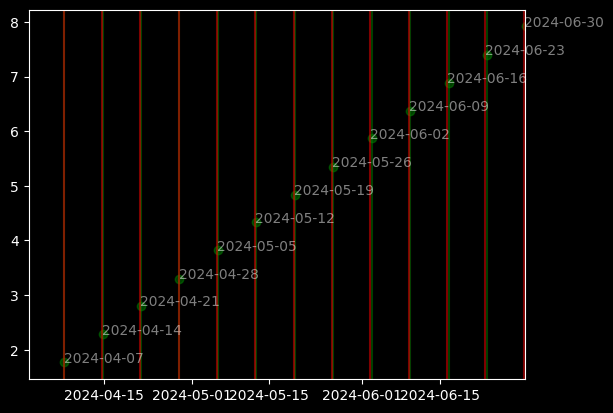

In [64]:

first_quadrature = transits.loc[transits.phase==0.25, "midpointcalendar"]

# for each first quadrature, find the closest end date of visibility
for date in first_quadrature:
    # find the closest end date of visibility after first quadrature to capture the narrowest possible cone
    closest_end_date = vis_atca.loc[vis_atca.date_end > date, "date_end"].min()
    # plot a vertical line
    plt.axvline(closest_end_date, color='green', alpha=0.5)
    plt.axvline(date, color='red', alpha=0.5)

    val = (closest_end_date-date).total_seconds()/60/60

    # plot the date next to the vertical red line in white
    plt.text(date, val, str(date.date()), color='white', alpha=0.5)

    plt.scatter([closest_end_date], [val], color='green', alpha=0.5)
plt.xlim(pd.to_datetime("2024-04-01 09:33:00"), pd.to_datetime("2024-06-30 10:33:00"))

In [62]:
(closest_end_date-date).total_seconds()/60

475.0

(19814.397916666665, 19904.439583333333)

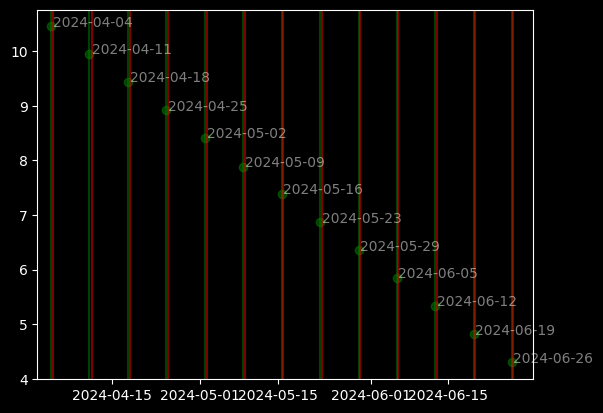

In [67]:
second_quadrature = transits.loc[transits.phase==0.75, "midpointcalendar"]

# for each first quadrature, find the closest end date of visibility
for date in second_quadrature:
    # find the closest start date of visibility *before* second quadrature 
    # to capture the narrowest possible cone without missing the 90 deg cone
    closest_start_date = vis_atca.loc[vis_atca.date_start < date, "date_end"].max()
    # plot a vertical line
    plt.axvline(closest_start_date, color='green', alpha=0.5)
    plt.axvline(date, color='red', alpha=0.5)

    val = (date - closest_start_date).total_seconds()/60/60

    # plot the date next to the vertical red line in white
    plt.text(date, val, str(date.date()), color='white', alpha=0.5)

    plt.scatter([closest_start_date], [val], color='green', alpha=0.5)
plt.xlim(pd.to_datetime("2024-04-01 09:33:00"), pd.to_datetime("2024-06-30 10:33:00"))

In [69]:
11/24/6.959*360

23.710303204483402

In [71]:
90-16/24/6.959*360

55.51228624802414